In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import HBox, VBox, interactive
import numpy as np 
import pickle
import plotly.express as px
import matplotlib.colors as mcol
from modules import *
import matplotlib.pyplot as plt

In [ ]:
cme = pickle.load(open('pickles/mf_run.p', 'rb'))
print(cme)
gridsize = (10,10)

In [ ]:
policy = []
choice = []
value  = []
coords = np.vstack(cme.keys())
print(coords)
for i in cme.keys():
    policy.append(cme[i][0])
    choice.append(cme[i][1])
    value.append(cme[i][2])

In [ ]:
fig = go.FigureWidget(
    data = go.Scatter(x = coords[:,0], y=coords[:,1], 
                      mode='markers', 
                      marker =dict(size =10, 
                                   color=value, 
                                   colorbar = dict(title="Value"), 
                                   colorscale="Viridis")))
fig.update_xaxes(range=[-0.5,gridsize[0]-0.5], tickvals = list(np.arange(gridsize[0])))
fig.update_yaxes(range=[-0.5,gridsize[1]-0.5], tickvals = list(np.arange(gridsize[1])))

fig.data[0].text = value
fig.data[0].hoverinfo = 'text'

fig.show()

In [ ]:
def set_opacity(opacity, size):
    fig.data[0].marker.opacity = opacity
    fig.data[0].marker.size = size
opacity_slider = interactive(set_opacity,
                            opacity = (0.0, 1.0, 0.01),
                            size = (1,10,0.25))
opacity_slider.children[0].layout.width = '400px'
opacity_slider.children[1].layout.width = '400px'

#opacity_slider
HBox([opacity_slider, fig])
import plotly
plotly.offline.iplot(fig, opacity_slider)

In [27]:
trunc = pickle.load(open('miniexpt.p', 'rb'))
long = pickle.load(open('miniexpt.p', 'rb'))

In [32]:
print(len(trunc))
wo_pen = trunc[0]
w_pen = trunc[1]

2


Text(0.5, 0.98, 'Truncated Trials')

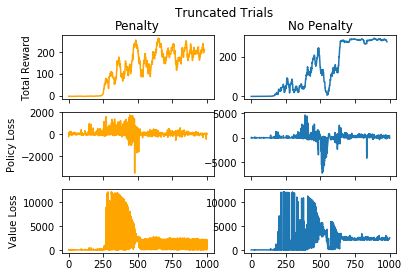

In [31]:
colors = ['tab:blue', 'orange', 'darkgreen']
f, ax = plt.subplots(3,2, sharex=True)

ax[0,0].plot(gp.running_mean(np.asarray(wo_pen[0]), 20), color=colors[1])
ax[0,0].set_ylabel('Total Reward')
ax[0,0].set_title('Penalty')
#ax[0,0].set_ylim([-5,1])

ax[0,1].plot(gp.running_mean(np.asarray(w_pen[0]), 20), color=colors[0])
ax[0,1].set_title('No Penalty')
#ax[0,1].set_ylim([-5,1])

ax[1,0].plot(wo_pen[1][0], color=colors[1])
ax[1,0].set_ylabel('Policy Loss')

ax[1,1].plot(w_pen[1][0], color=colors[0])

ax[2,0].plot(wo_pen[1][1], color=colors[1])
ax[2,0].set_ylabel('Value Loss')

ax[2,1].plot(w_pen[1][1], color=colors[0])
plt.suptitle('Truncated Trials')

In [ ]:
eop = pickle.load(open('pickles/effect_of_penalization_on_learning.p', 'rb'))
full = eop[0]
short = eop[1]

f_ = np.asarray(full)
s_ = np.asarray(short)

smoothing = 20
full_non = gp.running_mean(np.mean(f_[0],axis=0), smoothing)
full_pen = gp.running_mean(np.mean(f_[1],axis=0), smoothing)

shrt_non = gp.running_mean(np.mean(s_[0],axis=0), smoothing)
shrt_pen = gp.running_mean(np.mean(s_[1],axis=0), smoothing)


fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(full_non, label='non')
ax[0].plot(full_pen, label='pen')

ax[1].plot(shrt_non)
ax[1].plot(shrt_pen)

ax[0].legend(bbox_to_anchor=(0.85, 0.5))

va, pa = ac.snapshot(maze,run_dict['agent'])
reload(gp)
gp.plot_valmap(maze,va)
gp.plot_polmap(maze,pa)